In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"D:\titanic_dataset.csv")

In [3]:
df.loc[df["Age"].isnull(),"Age"]=28.0

In [4]:
df.loc[df["Embarked"].isnull(),"Embarked"]="S"

In [5]:
df.drop(["Cabin"],axis=1,inplace=True)

In [6]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [7]:
df["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [8]:
df["Gender"].replace({"male":1,"female":0},inplace=True)

In [9]:
#Logistic Regression
x=df[["Gender","Age","Fare","Pclass"]]

In [10]:
x

,Gender,Age,Fare,Pclass
0,1,22.0,7.2500,3
1,0,38.0,71.2833,1
2,0,26.0,7.9250,3
3,0,35.0,53.1000,1
4,1,35.0,8.0500,3
...,...,...,...,...
886,1,27.0,13.0000,2
887,0,19.0,30.0000,1
888,0,28.0,23.4500,3
889,1,26.0,30.0000,1


In [11]:
y=df["Survived"]

In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [15]:
x_train

,Gender,Age,Fare,Pclass
426,0,28.0,26.0000,2
844,1,17.0,8.6625,3
117,1,29.0,21.0000,2
298,1,28.0,30.5000,1
795,1,39.0,13.0000,2
...,...,...,...,...
740,1,28.0,30.0000,1
399,0,28.0,12.6500,2
828,1,28.0,7.7500,3
562,1,28.0,13.5000,2


In [16]:
x_test

,Gender,Age,Fare,Pclass
524,1,28.00,7.2292,3
539,0,22.00,49.5000,1
335,1,28.00,7.8958,3
633,1,28.00,0.0000,1
803,1,0.42,8.5167,3
...,...,...,...,...
421,1,21.00,7.7333,3
888,0,28.00,23.4500,3
170,1,61.00,33.5000,1
475,1,28.00,52.0000,1


In [17]:
from sklearn.linear_model import LogisticRegression 

In [18]:
lr=LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
lr.predict([[0,11.0,31.2750,3]])

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
lr.score(x_test,y_test)

0.7932960893854749

In [22]:
df["Fare"].astype("float")

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<Axes: ylabel='Fare'>

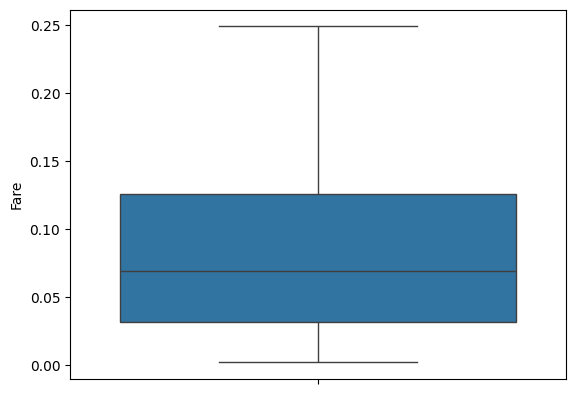

In [23]:
sns.boxplot(df["Fare"]**-1)

In [24]:
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C


In [25]:
df.loc[886:889,"Name":"Age"]

,Name,Gender,Age
886,"Montvila, Rev. Juozas",1,27.0
887,"Graham, Miss. Margaret Edith",0,19.0
888,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0
889,"Behr, Mr. Karl Howell",1,26.0


In [26]:
df[df["PassengerId"]==523]

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
522,523,0,3,"Lahoud, Mr. Sarkis",1,28.0,0,0,2624,7.225,C


In [27]:
import numpy as np

In [28]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()

In [29]:
x["Fare"]=mx.fit_transform(x[["Fare"]])

C:\Users\vaish\AppData\Local\Temp\ipykernel_16912\2501374451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Fare"]=mx.fit_transform(x[["Fare"]])


In [30]:
x["Age"]=mx.fit_transform(x[["Age"]])

C:\Users\vaish\AppData\Local\Temp\ipykernel_16912\3088129024.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Age"]=mx.fit_transform(x[["Age"]])


In [31]:
x

,Gender,Age,Fare,Pclass
0,1,0.271174,0.014151,3
1,0,0.472229,0.139136,1
2,0,0.321438,0.015469,3
3,0,0.434531,0.103644,1
4,1,0.434531,0.015713,3
...,...,...,...,...
886,1,0.334004,0.025374,2
887,0,0.233476,0.058556,1
888,0,0.346569,0.045771,3
889,1,0.321438,0.058556,1


In [32]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2529)

In [34]:
x_train

,Gender,Age,Fare,Pclass
426,0,0.346569,0.050749,2
844,1,0.208344,0.016908,3
117,1,0.359135,0.040989,2
298,1,0.346569,0.059532,1
795,1,0.484795,0.025374,2
...,...,...,...,...
740,1,0.346569,0.058556,1
399,0,0.346569,0.024691,2
828,1,0.346569,0.015127,3
562,1,0.346569,0.026350,2


In [35]:
x_test  

,Gender,Age,Fare,Pclass
524,1,0.346569,0.014110,3
539,0,0.271174,0.096618,1
335,1,0.346569,0.015412,3
633,1,0.346569,0.000000,1
803,1,0.000000,0.016623,3
...,...,...,...,...
421,1,0.258608,0.015094,3
888,0,0.346569,0.045771,3
170,1,0.761247,0.065388,1
475,1,0.346569,0.101497,1


In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(x_train,y_train)

LogisticRegression()

In [39]:
lr.predict([[1,0.346569,0.014110,3]])

C:\Users\vaish\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
lr.score(x_test,y_test)

0.7932960893854749

In [41]:
dk=pd.read_csv("D:\Output.csv")

In [42]:
dk

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,0,1
4,1,0
...,...,...
95,0,0
96,1,0
97,0,1
98,0,0


In [43]:
tp=len(dk[(dk["Actual"]==1) & (dk["Predicted"]==1)])

In [44]:
fp=len(dk[(dk["Actual"]==0) & (dk["Predicted"]==1)])

In [45]:
fn=len(dk[(dk["Actual"]==1) & (dk["Predicted"]==0)])


In [46]:
tn=len(dk[(dk["Actual"]==0) & (dk["Predicted"]==0)])

In [47]:
#Accuracy Score
(tp+tn)/(tp+fp+fn+tn)

0.57

In [48]:
Precision=(tp)/(tp+fp)

In [49]:
Precision

0.5925925925925926

In [50]:
Recall=(tp)/(tp+fn)

In [51]:
Recall

0.6037735849056604